# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Agustinus Alvin Wicaksono
- **Email:** A361YBF022@devacademy.id
- **ID Dicoding:** agustinusalvinwicaksono / A361YBF022

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import geopandas as gpd
import folium

ModuleNotFoundError: No module named 'geopandas'

## Data Wrangling

### Gathering Data

In [19]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [23]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [27]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [28]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat duplikasi data.
- xxx

### Cleaning Data

In [31]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [32]:
day_df.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','cnt':'count_rent','hum':'humidity','hr':'hour'},inplace=True)

In [33]:
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
day_df.weekday.replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), inplace=True)
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
day_df.weather.replace((1,2,3,4), ('Clear','Mist','Lightsnow','Heavyrain'), inplace=True)

C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\2530504116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\2530504116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the i

In [34]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [35]:
hour_df.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','cnt':'count_rent','hum':'humidity','hr':'hour'},inplace=True)

In [36]:
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.weather.replace((1,2,3,4), ('Clear','Mist','Lightsnow','Heavyrain'), inplace=True)

C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3969327790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3969327790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

**Insight:**
- Mengubah 'yr' menjadi 'year','mnth' menjadi 'month','weathersit' menjadi 'weather','cnt' menjadi 'count_rent','hum' menjadi 'humidity','hr' menjadi 'hour' di hour.csv dan day.csv
- Mengubah tipe data dteday menjadi datetime 

## Exploratory Data Analysis (EDA)

### Explore ...

In [37]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count_rent
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,NaN,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count_rent
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,NaN,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

In [39]:
day_df.groupby(by="weather").agg({
    "casual": ["sum"],
    "registered": ["sum"],
    "count_rent": ["sum"]
})

,casual,registered,count_rent
,sum,sum,sum
weather,,,
Clear,446346,1811606,2257952
Lightsnow,3895,33974,37869
Mist,169776,827082,996858


In [40]:
sum_order_items_df = day_df.groupby("weather").count_rent.sum().sort_values(ascending=False).reset_index()

C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3114002801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3114002801.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


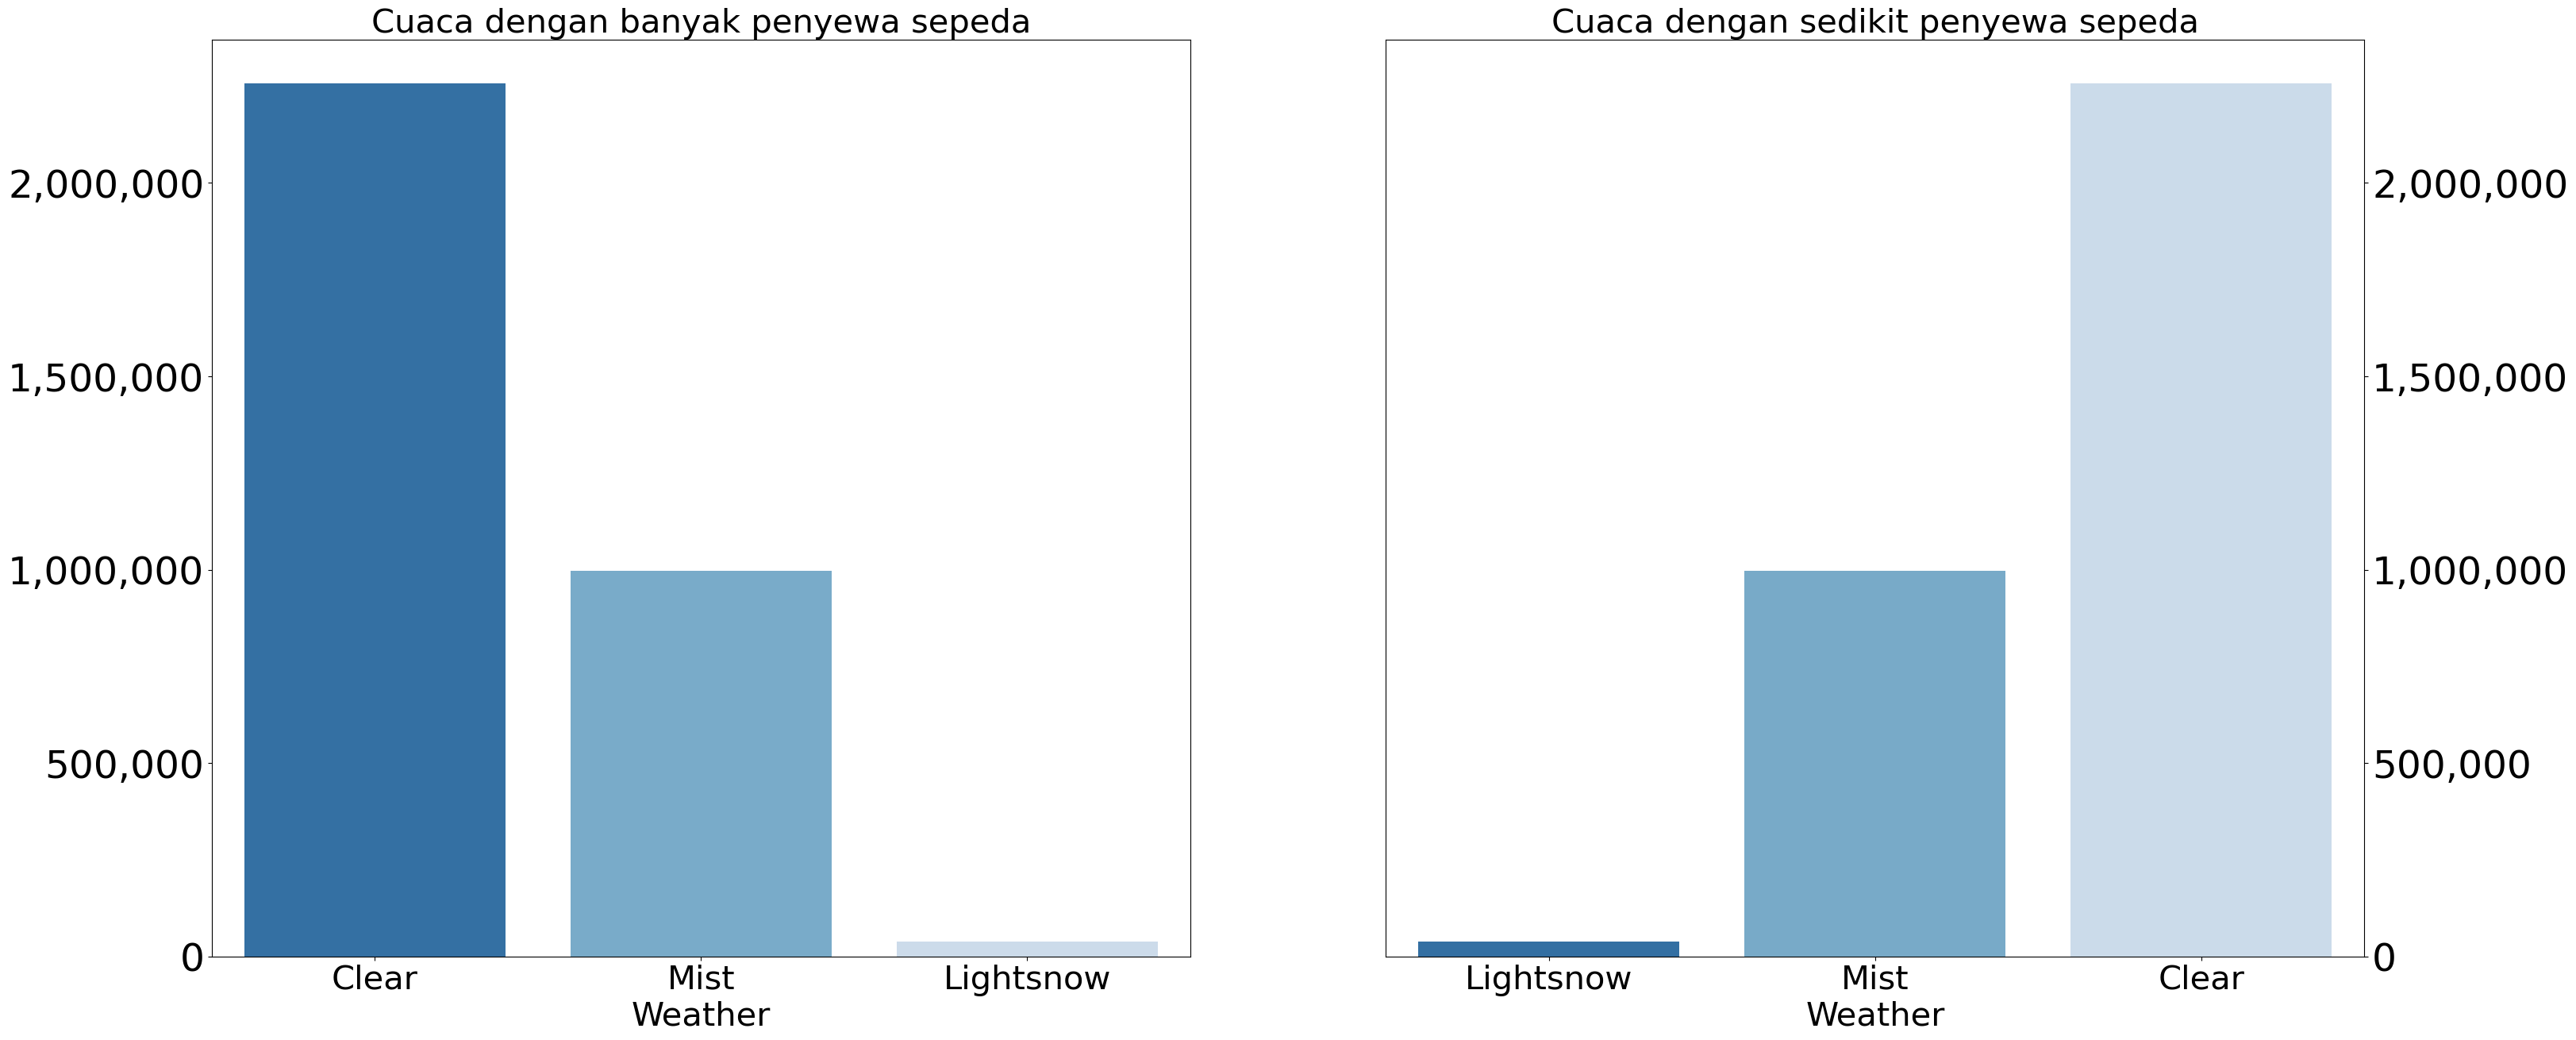

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

df_sorted1 = sum_order_items_df.sort_values(by="count_rent", ascending=False)

sns.barplot(
    x="weather",
    y="count_rent",
    data=df_sorted1,
    order=df_sorted1["weather"],  
    palette=sns.color_palette("Blues_r", len(df_sorted1)),  
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel("Weather", fontsize=30)
ax[0].set_title("Cuaca dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

ax[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


df_sorted2 = sum_order_items_df.sort_values(by="count_rent", ascending=True).iloc[::-1]

sns.barplot(
    x="weather",
    y="count_rent",
    data=df_sorted2,
    order=df_sorted2["weather"],  
    palette=sns.color_palette("Blues", len(df_sorted2)),  
    ax=ax[1]
)

ax[1].set_ylabel(None)
ax[1].set_xlabel("Weather", fontsize=30)
ax[1].set_title("Cuaca dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan musim?

In [42]:
day_df.groupby(by="season").agg({
    "casual": ["sum"],
    "registered": ["sum"],
    "count_rent": ["sum"]
})

,casual,registered,count_rent
,sum,sum,sum
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [43]:
sum_order_items_df = day_df.groupby("season").count_rent.sum().sort_values(ascending=False).reset_index()

C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\1669472196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\1669472196.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


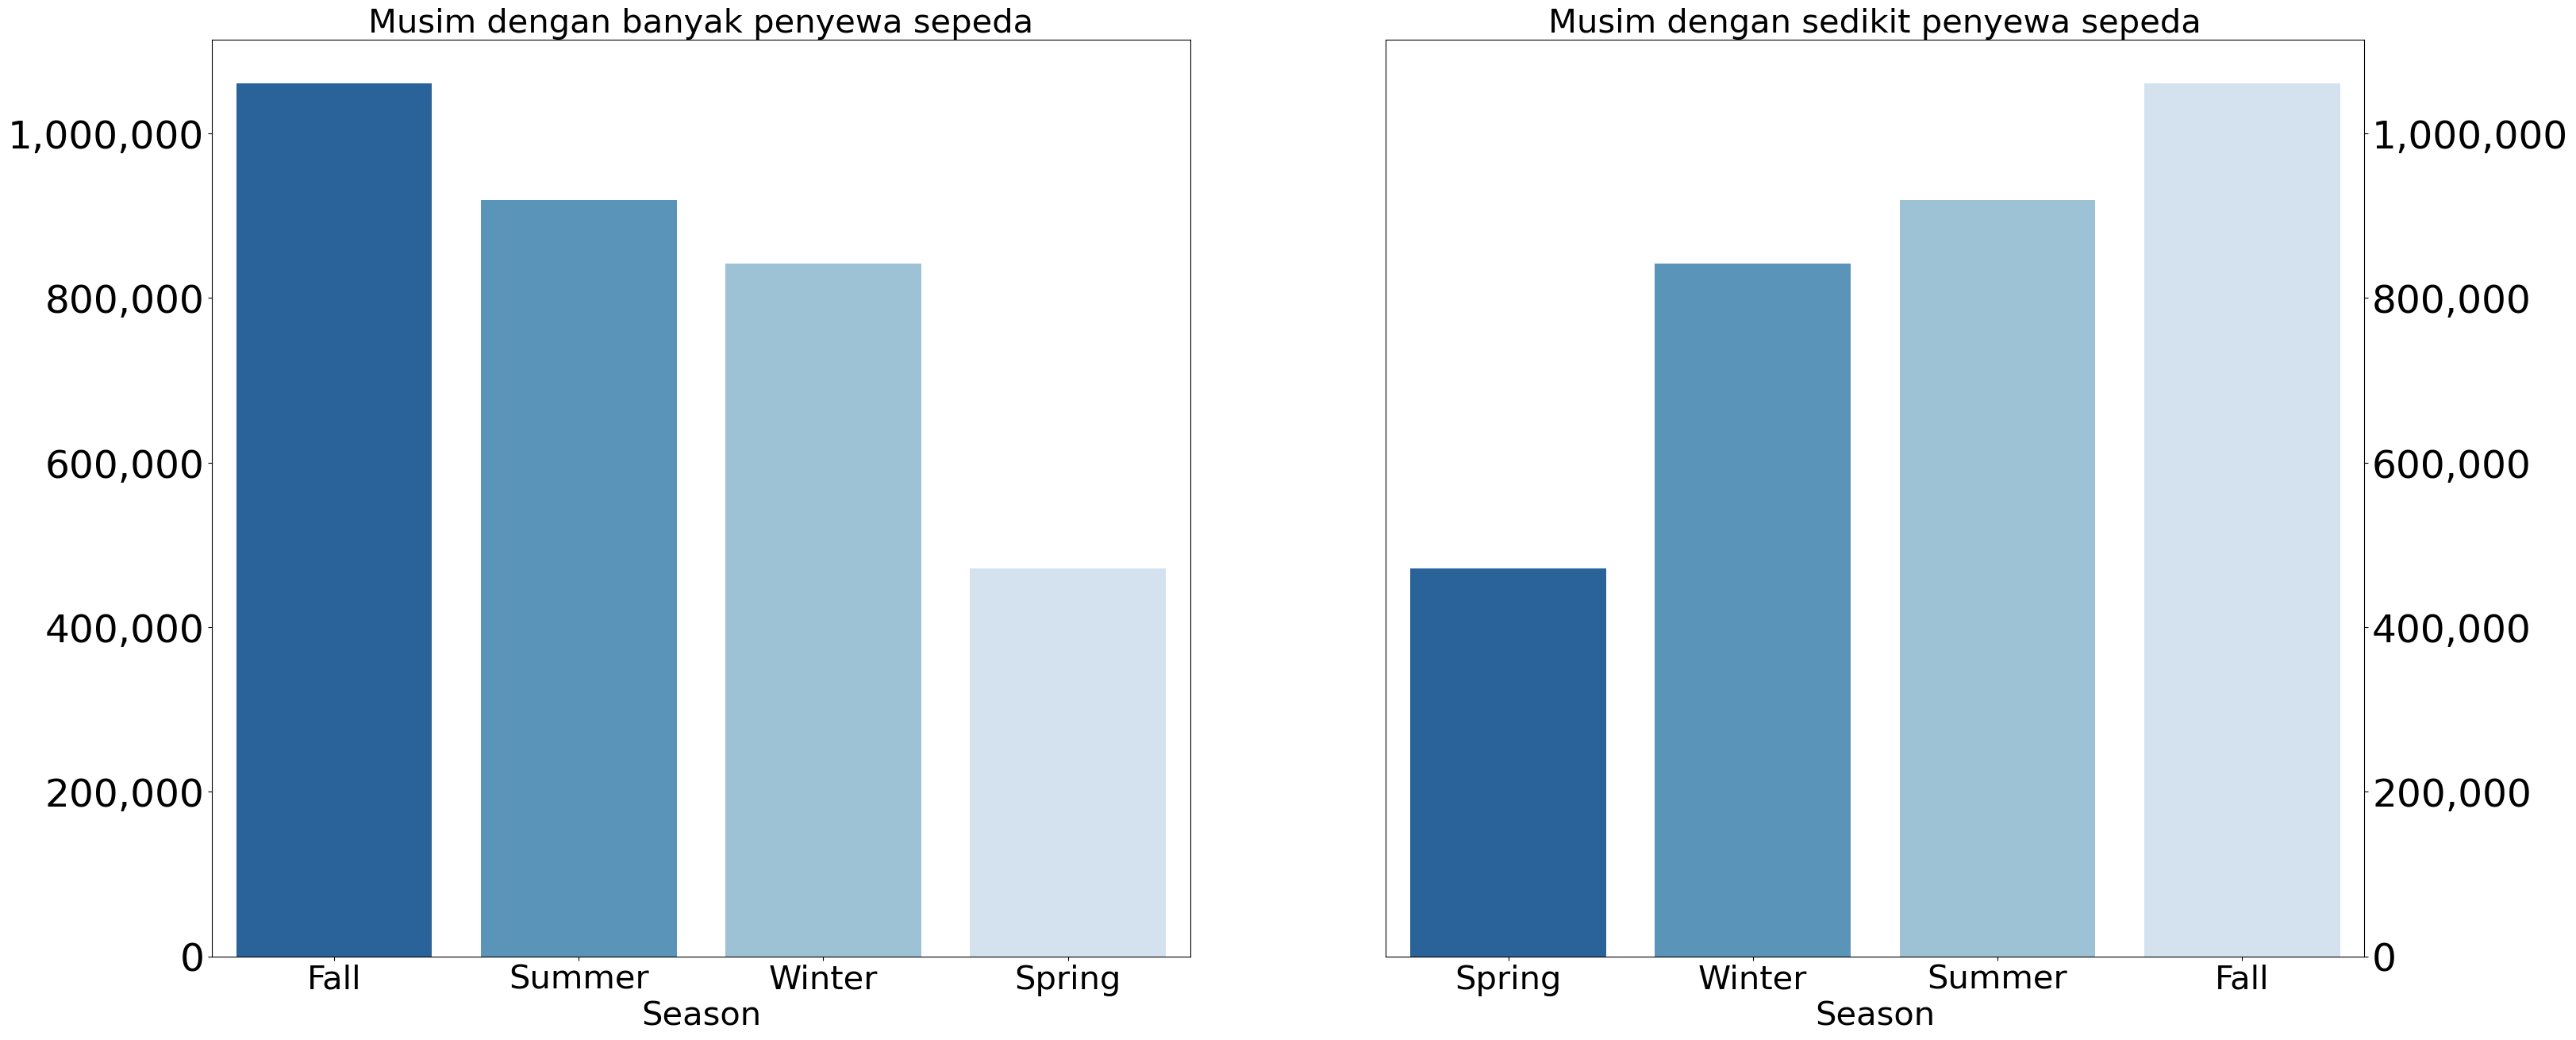

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

df_sorted1 = sum_order_items_df.sort_values(by="count_rent", ascending=False)

sns.barplot(
    x="season",
    y="count_rent",
    data=df_sorted1,
    order=df_sorted1["season"],  
    palette=sns.color_palette("Blues_r", len(df_sorted1)),  
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel("Season", fontsize=30)
ax[0].set_title("Musim dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)


ax[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


df_sorted2 = sum_order_items_df.sort_values(by="count_rent", ascending=True).iloc[::-1]

sns.barplot(
    x="season",
    y="count_rent",
    data=df_sorted2,
    order=df_sorted2["season"],  
    palette=sns.color_palette("Blues", len(df_sorted2)),  
    ax=ax[1]
)

ax[1].set_ylabel(None)
ax[1].set_xlabel("Season", fontsize=30)
ax[1].set_title("Musim dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()

**Insight:**
- Pada cuaca Clear cenderung lebih banyak penyewa sepeda, lalu dilanjut dengan Mist, dan pada cuaca Lightsnow paling sedikit penyewa sepeda.
- Pada musim Fall cenderung lebih banyak penyewa sepeda, lalu dilanjut dengan musim Summer, lalu Winter, dan pada musim Spring paling sedikit penyewa sepeda.

## Analisis Lanjutan (Opsional)

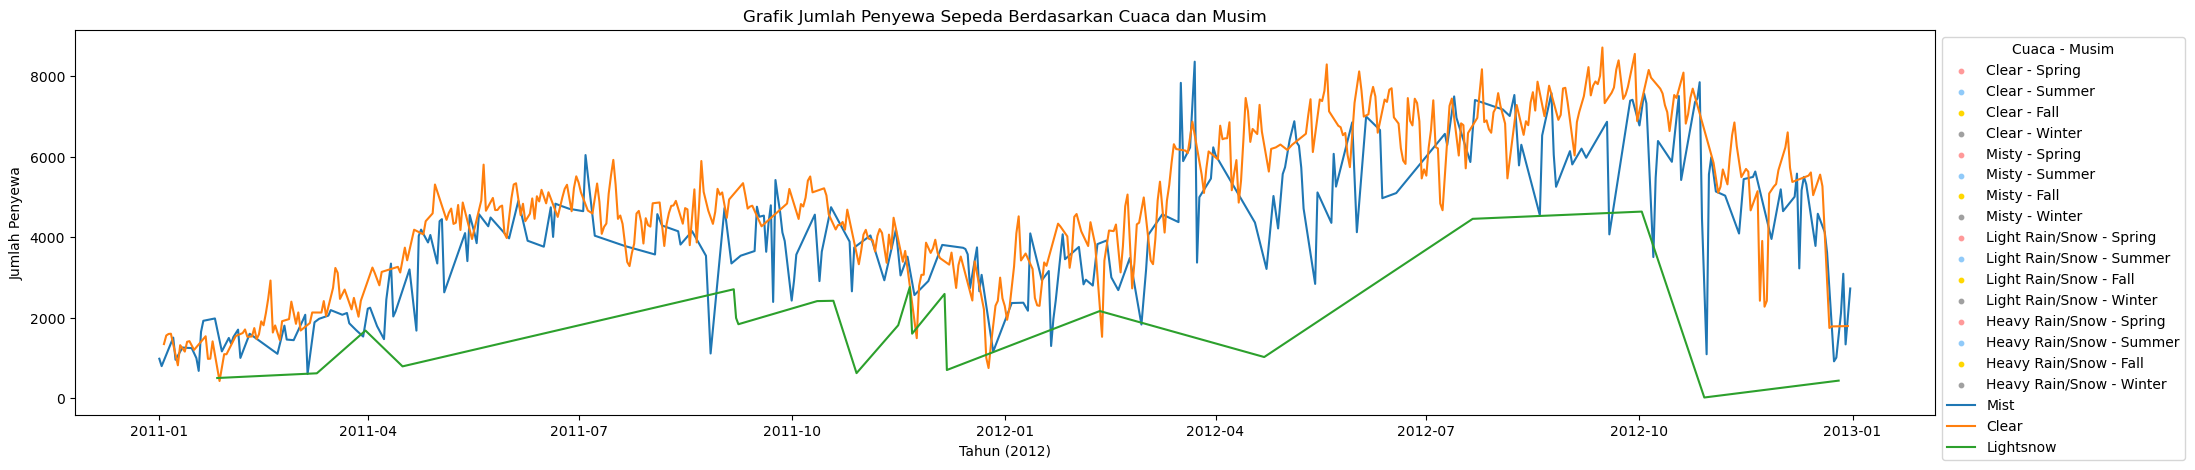

In [45]:
plt.figure(figsize=(24, 5))

weather_season_counts = day_df.groupby(["dteday", "weather", "season"])["count_rent"].sum().reset_index()

weather_labels = {1: "Clear", 2: "Misty", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

season_colors = {1: "#FF9999", 2: "#90CAF9", 3: "#FFD700", 4: "#A0A0A0"}  

for weather_type, weather_label in weather_labels.items():
    for season_type, season_label in season_labels.items():
        subset = weather_season_counts[
            (weather_season_counts["weather"] == weather_type) & 
            (weather_season_counts["season"] == season_type)
        ]
        plt.scatter(
            subset["dteday"], 
            subset["count_rent"], 
            s=10, 
            label=f"{weather_label} - {season_label}", 
            color=season_colors[season_type]
        )


sns.lineplot(x="dteday", y="count_rent", hue="weather", data=weather_season_counts, linewidth=1.5)


plt.xlabel('Tahun (2012)')
plt.ylabel('Jumlah Penyewa')
plt.title('Grafik Jumlah Penyewa Sepeda Berdasarkan Cuaca dan Musim')
plt.legend(title="Cuaca - Musim", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\823309084.py:42: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


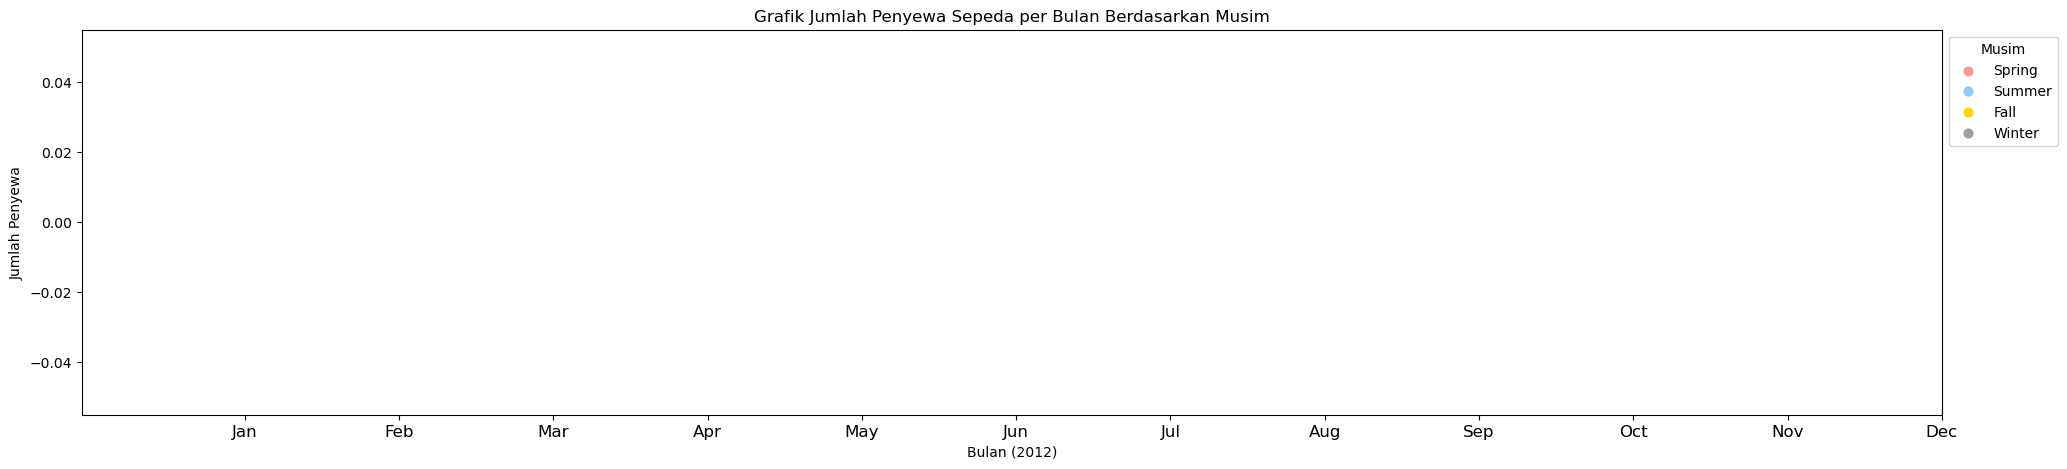

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'dteday' to datetime format
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Extract month from date
day_df["month"] = day_df["dteday"].dt.month

# Define season labels and colors
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_colors = {"Spring": "#FF9999", "Summer": "#90CAF9", "Fall": "#FFD700", "Winter": "#A0A0A0"}

# Define month names for x-axis
month_labels = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

# Aggregate count_rent per month and season
monthly_counts = day_df.groupby(["month", "season"])["count_rent"].sum().reset_index()

# Convert season numbers to names for proper plotting
monthly_counts["season"] = monthly_counts["season"].map(season_labels)

# Create figure
plt.figure(figsize=(24, 5))

# Scatter plot for each season
for season_type, season_label in season_labels.items():
    subset = monthly_counts[monthly_counts["season"] == season_label]
    plt.scatter(
        subset["month"], 
        subset["count_rent"], 
        s=40, 
        label=season_label, 
        color=season_colors[season_label]
    )

# Line plot for trends
sns.lineplot(
    x="month", 
    y="count_rent", 
    hue="season", 
    data=monthly_counts, 
    linewidth=2.5, 
    palette=season_colors
)

# Format x-axis to show month names
plt.xticks(ticks=list(month_labels.keys()), labels=list(month_labels.values()), fontsize=12)

# Labels and title
plt.xlabel("Bulan (2012)")
plt.ylabel("Jumlah Penyewa")
plt.title("Grafik Jumlah Penyewa Sepeda per Bulan Berdasarkan Musim")
plt.legend(title="Musim", loc="upper left", bbox_to_anchor=(1, 1))

# Show plot
plt.show()


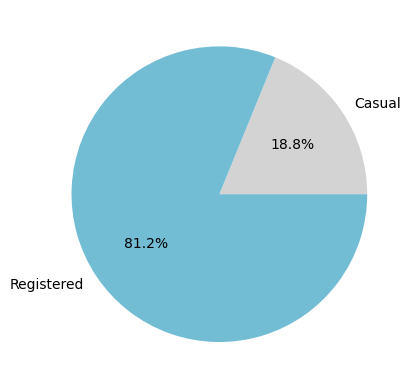

In [47]:
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan pie plot
plt.show()

In [48]:
current_date = max(hour_df['dteday'])
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_rent': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3756171522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="registered",
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3756171522.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="registered",
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\3756171522.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary", x="registered",


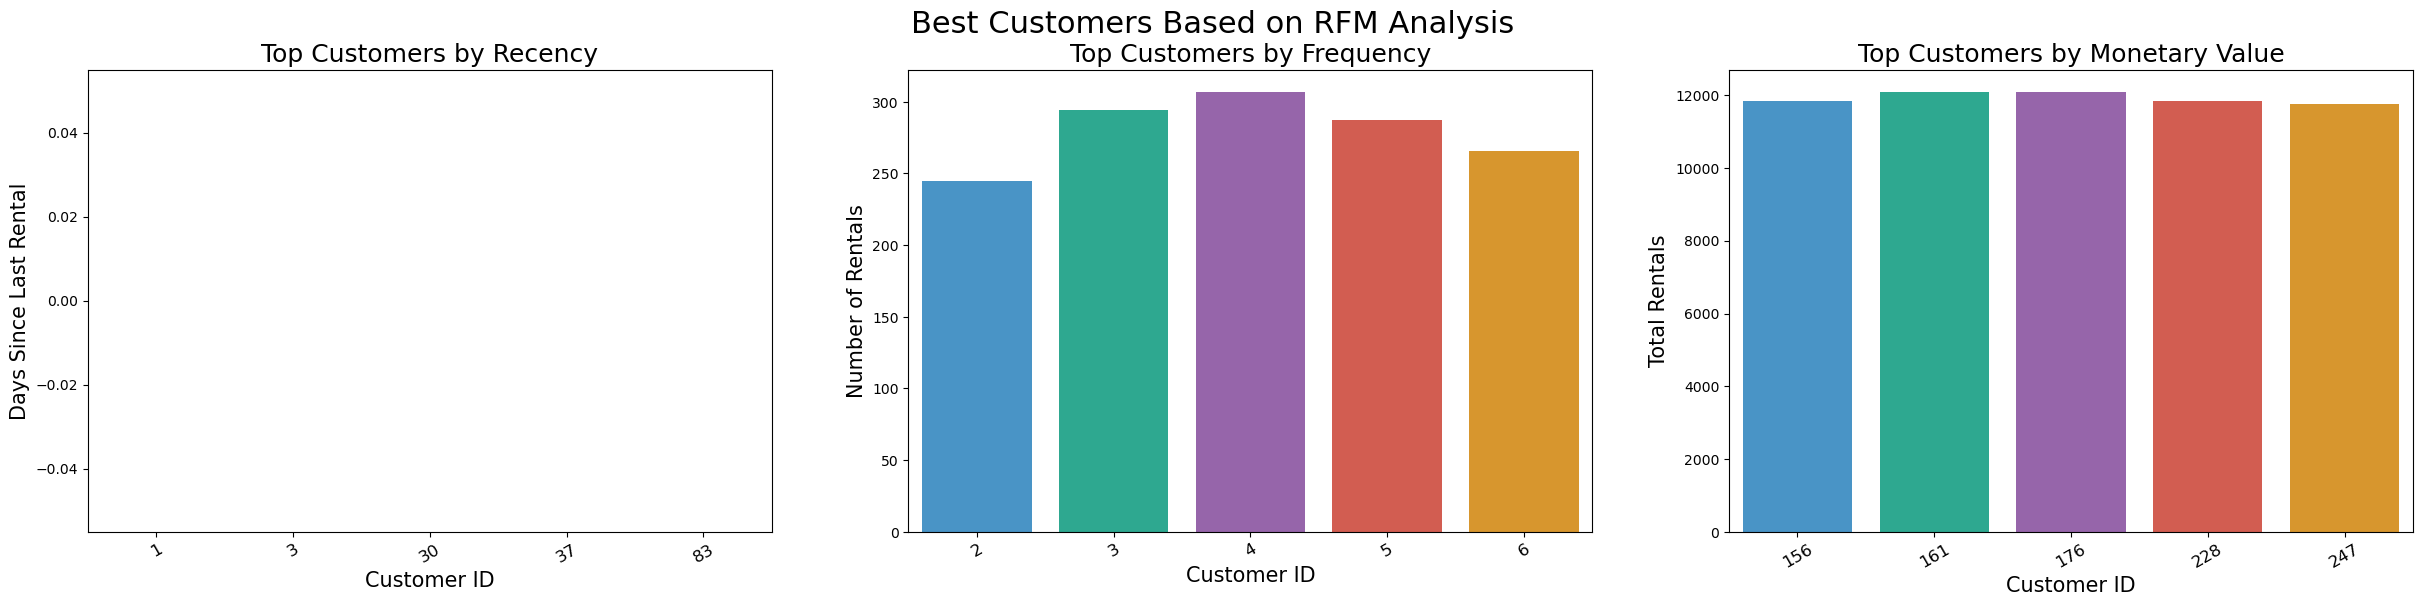

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#3498DB", "#1ABC9C", "#9B59B6", "#E74C3C", "#F39C12"]

sns.barplot(y="Recency", x="registered", 
            data=rfm_df.sort_values(by="Recency", ascending=True).head(5), 
            palette=colors, ax=ax[0])

ax[0].set_ylabel("Days Since Last Rental", fontsize=15)
ax[0].set_xlabel("Customer ID", fontsize=15)
ax[0].set_title("Top Customers by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12, rotation=30)

sns.barplot(y="Frequency", x="registered", 
            data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1])

ax[1].set_ylabel("Number of Rentals", fontsize=15)
ax[1].set_xlabel("Customer ID", fontsize=15)
ax[1].set_title("Top Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12, rotation=30)

sns.barplot(y="Monetary", x="registered", 
            data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2])

ax[2].set_ylabel("Total Rentals", fontsize=15)
ax[2].set_xlabel("Customer ID", fontsize=15)
ax[2].set_title("Top Customers by Monetary Value", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12, rotation=30)

plt.suptitle("Best Customers Based on RFM Analysis", fontsize=22)

plt.show()

C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\996315390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="registered",
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\996315390.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="registered",
C:\Users\Vyn\AppData\Local\Temp\ipykernel_4812\996315390.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary", x="registered",


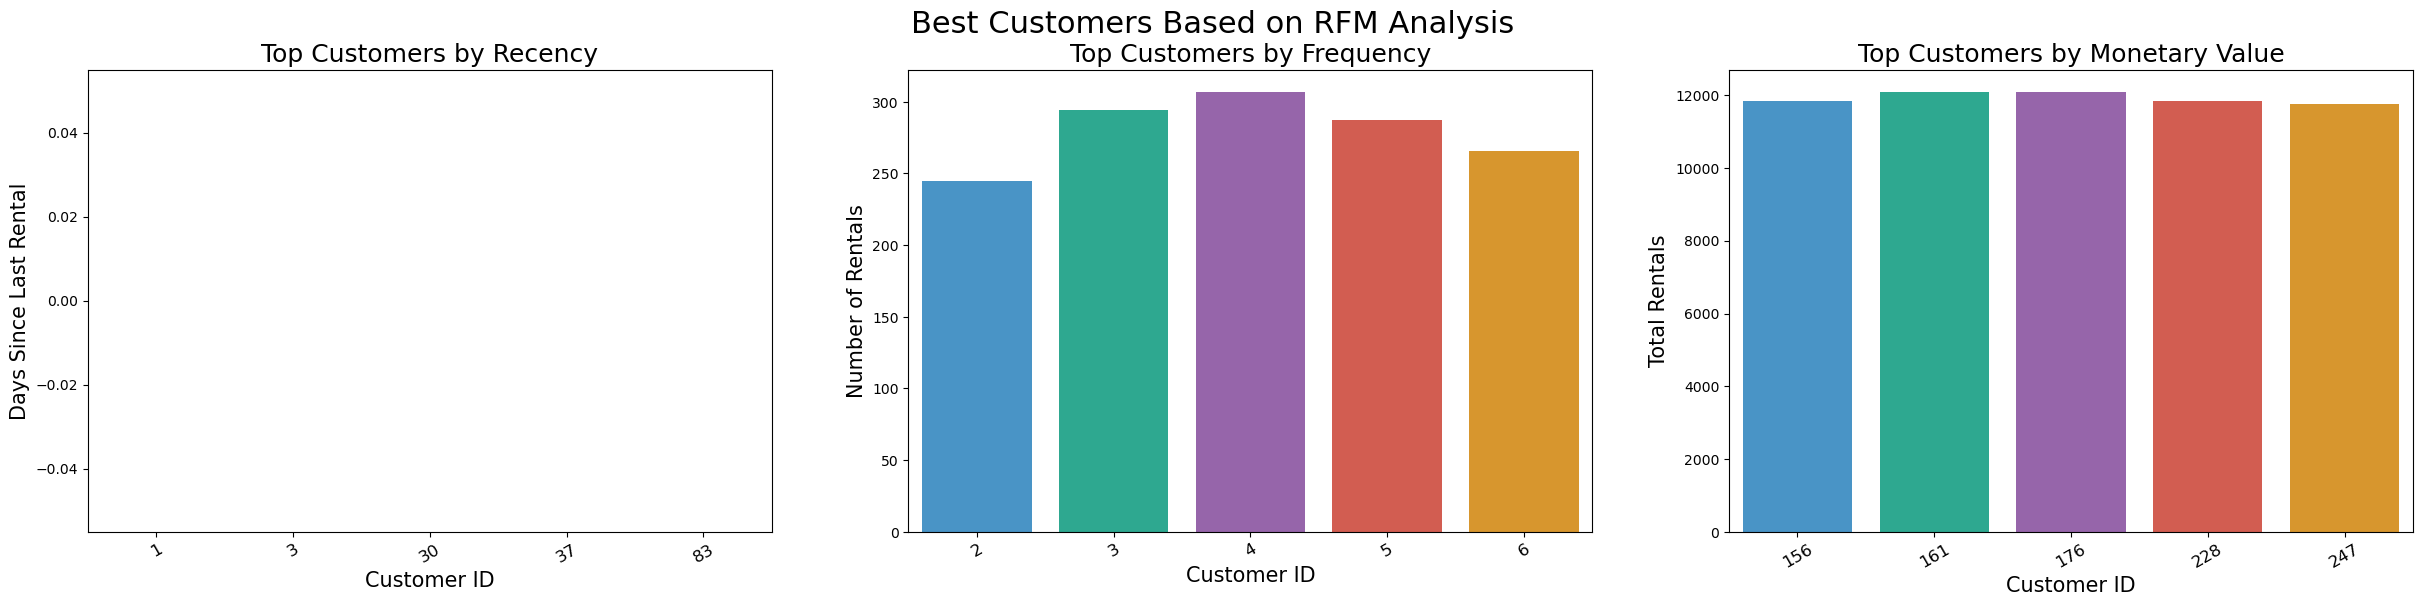

In [50]:
# Create figure
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Define color palette
colors = ["#3498DB", "#1ABC9C", "#9B59B6", "#E74C3C", "#F39C12"]

# **Recency (Days Since Last Rental)**
sns.barplot(y="Recency", x="registered", 
            data=rfm_df.sort_values(by="Recency", ascending=True).head(5), 
            palette=colors, ax=ax[0])

ax[0].set_ylabel("Days Since Last Rental", fontsize=15)
ax[0].set_xlabel("Customer ID", fontsize=15)
ax[0].set_title("Top Customers by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12, rotation=30)

# **Frequency (Number of Rentals)**
sns.barplot(y="Frequency", x="registered", 
            data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), 
            palette=colors, ax=ax[1])

ax[1].set_ylabel("Number of Rentals", fontsize=15)
ax[1].set_xlabel("Customer ID", fontsize=15)
ax[1].set_title("Top Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12, rotation=30)

# **Monetary (Total Rentals)**
sns.barplot(y="Monetary", x="registered", 
            data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), 
            palette=colors, ax=ax[2])

ax[2].set_ylabel("Total Rentals", fontsize=15)
ax[2].set_xlabel("Customer ID", fontsize=15)
ax[2].set_title("Top Customers by Monetary Value", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12, rotation=30)

# **Overall title**
plt.suptitle("Best Customers Based on RFM Analysis", fontsize=22)

# Show plot
plt.show()

In [51]:
print(rfm_df.dtypes)


registered    int64
Recency       int64
Frequency     int64
Monetary      int64
dtype: object


In [52]:

# Sample dataset
data = {'customer_id': [1, 2, 1, 3, 2, 1, 4, 3],
        'order_date': pd.to_datetime(['2024-01-01', '2024-01-03', '2024-01-10', '2024-01-12', 
                                      '2024-01-15', '2024-01-20', '2024-01-25', '2024-01-30']),
        'amount': [100, 200, 150, 300, 250, 200, 350, 400]}

df = pd.DataFrame(data)

# Reference date (today)
reference_date = pd.to_datetime('2024-02-01')

# Compute Recency separately
recency = df.groupby('customer_id')['order_date'].max().apply(lambda x: (reference_date - x).days)

# Compute Frequency and Monetary
rfm = df.groupby('customer_id').agg(
    Frequency=('order_date', 'count'),
    Monetary=('amount', 'sum')
)

# Merge Recency into RFM dataframe
rfm['Recency'] = recency

# Rearrange columns
rfm = rfm[['Recency', 'Frequency', 'Monetary']]

print(rfm)



             Recency  Frequency  Monetary
customer_id                              
1                 12          3       450
2                 17          2       450
3                  2          2       700
4                  7          1       350


In [55]:


# Contoh dataset dengan koordinat pelanggan
data_geo = {'customer_id': [1, 2, 3, 4],
            'latitude': [-6.2088, -6.9175, -7.2504, -6.9147],  # Koordinat di Indonesia
            'longitude': [106.8456, 107.6191, 112.7688, 107.6098]}

df_geo = pd.DataFrame(data_geo)

# Membuat peta menggunakan Folium
m = folium.Map(location=[-6.5, 107], zoom_start=6)

# Menambahkan marker untuk setiap pelanggan
for index, row in df_geo.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  popup=f"Customer ID: {row['customer_id']}").add_to(m)

# Menampilkan peta
m


ModuleNotFoundError: No module named 'geopandas'

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2